Text(10,579168,'uncompressed input size')

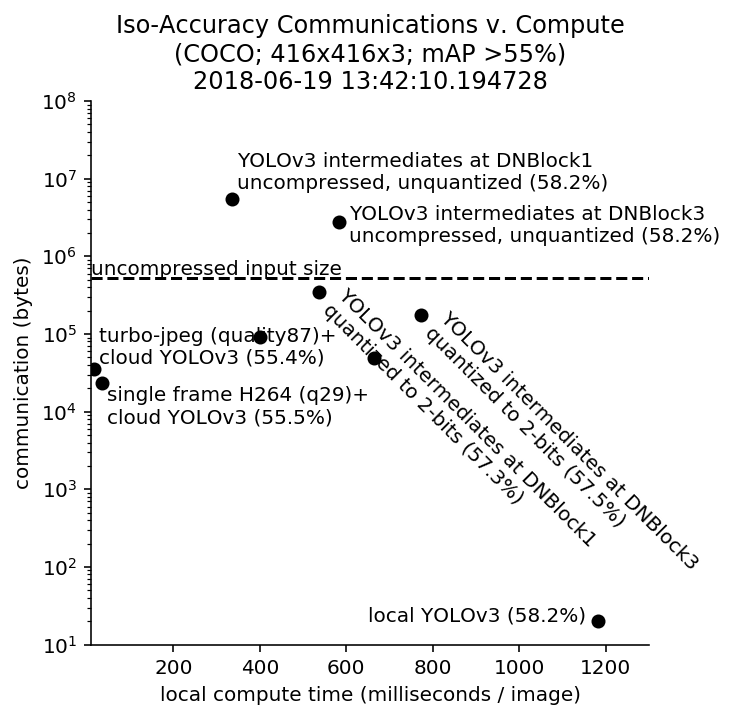

In [143]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
import matplotlib.pyplot as plt
import math 
import datetime

# files = ['simplenet9', 'resnet18', 'mobilenetv2.1000']
# paths = list(map(lambda x : os.path.join(DATA_PREFIX, x, 'training_log.csv'), files))
# data = no_plot_summarize_accuracy(paths)

# x_compute = list(map(lambda x: x, [17.5, 331, 766, 1427]))
# y_network = [35729.15, 91643.54, 49568.14, 2.0]

x_compute = list(map(lambda x: x, [17.5, 36.0, 336, 583, 537, 773, 1181, 401.3, 664,]))
y_network = [35729.15, 23279.12, 4*128*104*104, 4*256*52*52, 
             128*104*104*(2/8), 256*52*52*(2/8), 20, 91643.54, 49568.14,]

fig = plt.figure(figsize=(5, 5))
fig.clear()

ax1 = fig.add_subplot(111)
ax1.set_xlim([10, 1300])
ax1.set_ylim([10,10**8])
ax1.set_title('Iso-Accuracy Communications v. Compute\n(COCO; 416x416x3; mAP >55%)\n{}'.format(datetime.datetime.now()
))
ax1.set_ylabel('communication (bytes)')
ax1.set_xlabel('local compute time (milliseconds / image)')
#ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
l1 = ax1.plot(x_compute, y_network, color="#000000", ls='', marker="o")

# for l,i,j in zip(label,x_compute,y_network):
#     ax1.annotate('  '+l, xy=(i,j), rotation=45, xytext=(-5,150), textcoords='offset pixels')
# ax1.annotate('simple9_thin (92.75%)', xy=(6.01, 2.0), rotation=45, xytext=(-5,165), textcoords='offset pixels')
# ax1.annotate('simple9 (94.3%)', xy=(14.9, 2.0), rotation=45, xytext=(-5,125), textcoords='offset pixels')
ax1.annotate('turbo-jpeg (quality87)+\ncloud YOLOv3 (55.4%)', xy=(17.5, 35729.15), xytext=(5,5), textcoords='offset pixels')
ax1.annotate('single frame H264 (q29)+\ncloud YOLOv3 (55.5%)', xy=(36.0, 23279.12), xytext=(5,-40), textcoords='offset pixels')
ax1.annotate('YOLOv3 intermediates at DNBlock1\nuncompressed, unquantized (58.2%)', xy=(336, 4*128*104*104), xytext=(5,10), textcoords='offset pixels')
ax1.annotate('YOLOv3 intermediates at DNBlock1\nquantized to 2-bits (57.3%)', xy=(537, 128*104*104*(2/8)), xytext=(0,-30), rotation=-45, textcoords='offset pixels')#ax1.annotate('local YOLOv3 split@DNBlock1 +\n YOLOv3 (q30) (55.7%)', xy=(331, 91643.54), xytext=(5,0), textcoords='offset pixels')
ax1.annotate('YOLOv3 intermediates at DNBlock3\nuncompressed, unquantized (58.2%)', xy=(583, 4*256*52*52), xytext=(10,-20), textcoords='offset pixels')
ax1.annotate('YOLOv3 intermediates at DNBlock3\nquantized to 2-bits (57.5%)', xy=(773, 256*52*52*(2/8)), xytext=(0,-30), rotation=-45, textcoords='offset pixels')#ax1.annotate('local YOLOv3 split@DNBlock1 +\n YOLOv3 (q30) (55.7%)', xy=(331, 91643.54), xytext=(5,0), textcoords='offset pixels')
#ax1.annotate('local YOLOv3 split@DNBlock1 +\n YOLOv3 (q30) (55.7%)', xy=(331, 91643.54), xytext=(5,0), textcoords='offset pixels')
#ax1.annotate('local YOLOv3 split@DNBlock3 +\n YOLOv3 (q39) (54.9%)', xy=(766, 46823.62), xytext=(10,-30), textcoords='offset pixels')
ax1.annotate('local YOLOv3 (58.2%)', xy=(1181, 20), xytext=(-230,0), textcoords='offset pixels')
    
ax1.plot([10,10000], [416*416*3, 416*416*3], color="#000000", ls='--')
ax1.annotate('uncompressed input size',xy=(10,416*416*3+60000))

Text(10,607,'uncompressed input size')

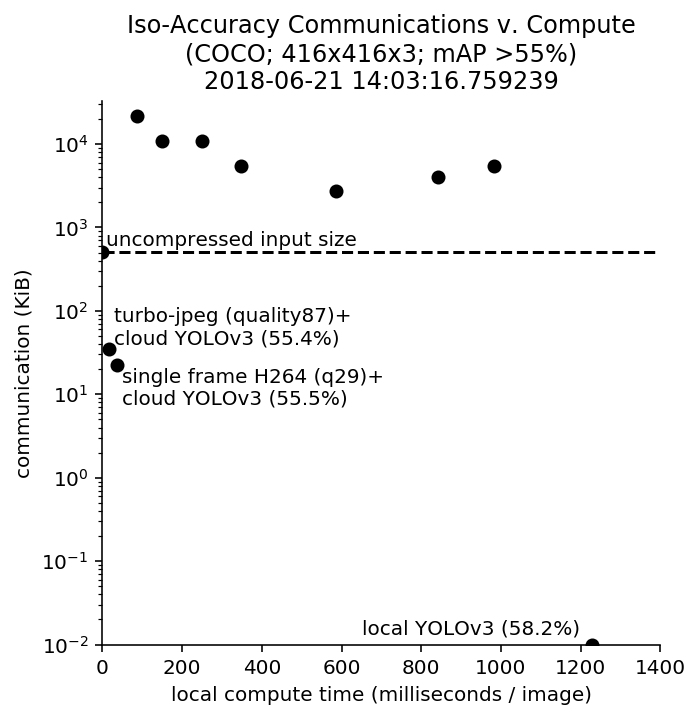

In [186]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
import matplotlib.pyplot as plt
import math 
import datetime

# files = ['simplenet9', 'resnet18', 'mobilenetv2.1000']
# paths = list(map(lambda x : os.path.join(DATA_PREFIX, x, 'training_log.csv'), files))
# data = no_plot_summarize_accuracy(paths)

# x_compute = list(map(lambda x: x, [17.5, 331, 766, 1427]))
# y_network = [35729.15, 91643.54, 49568.14, 2.0]

x_compute = list(map(lambda x: x, [17.5, 36.0, 0, 86.8, 149, 251, 348, 586, 843, 982, 1229]))
y_network = list(map(lambda x: x/1024, [35729.15, 23279.12,
                                        416*416*3, 
                                        4*32*416*416,
                                        4*64*208*208,
                                        4*64*208*208, 
                                        4*128*104*104,
                                        4*256*52*52, 
                                        4*256*52*52 + 4*512*26*26, 
                                        4*256*52*52 + 4*512*26*26 + 4*2014*13*13,
                                        10]))

fig = plt.figure(figsize=(5, 5))
fig.clear()

ax1 = fig.add_subplot(111)
ax1.set_xlim([0, 1400])
ax1.set_ylim([0.01, 2**15])
ax1.set_title('Iso-Accuracy Communications v. Compute\n(COCO; 416x416x3; mAP >55%)\n{}'.format(datetime.datetime.now()
))
ax1.set_ylabel('communication (KiB)')
ax1.set_xlabel('local compute time (milliseconds / image)')
#ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
l1 = ax1.plot(x_compute, y_network, color="#000000", ls='', marker="o")

ax1.annotate('turbo-jpeg (quality87)+\ncloud YOLOv3 (55.4%)', xy=(17.5, 35729.15/1024), xytext=(5,5), textcoords='offset pixels')
ax1.annotate('single frame H264 (q29)+\ncloud YOLOv3 (55.5%)', xy=(36.0, 23279.12/1024), xytext=(5,-40), textcoords='offset pixels')
ax1.annotate('local YOLOv3 (58.2%)', xy=(1229, 0.01), xytext=(-230,10), textcoords='offset pixels')

ax1.plot([1,1400], [416*416*3/1024, 416*416*3/1024], color="#000000", ls='--')
ax1.annotate('uncompressed input size',xy=(10,416*416*3/1024+100))